<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/ADABOOST_ML/blob/main/Adaboostclassifer_diabetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ADABOOST:
## About Dataset [DIABETIC]

**Context**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [1]:
## importing th libraies:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
## calling csv as data:
path = "/content/diabetic_clean.csv"
data  = pd.read_csv(path)
data.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
288,4,96,56,17,49,20.8,0.340,26,0
727,0,141,84,26,0,32.4,0.433,22,0
734,2,105,75,1,0,23.3,0.560,53,0


In [3]:
### checking the null values
print(f"\n null values:\n {data.isnull().sum()}\n")

## checking the sample:
print(f"\ndata_shape\n: {data.shape}\n")


## checking duplicated values:
print(f"duplicated values: {data.duplicated().sum()}\n")

# checking the info
data.info()


 null values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


data_shape
: (768, 9)

duplicated values: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  


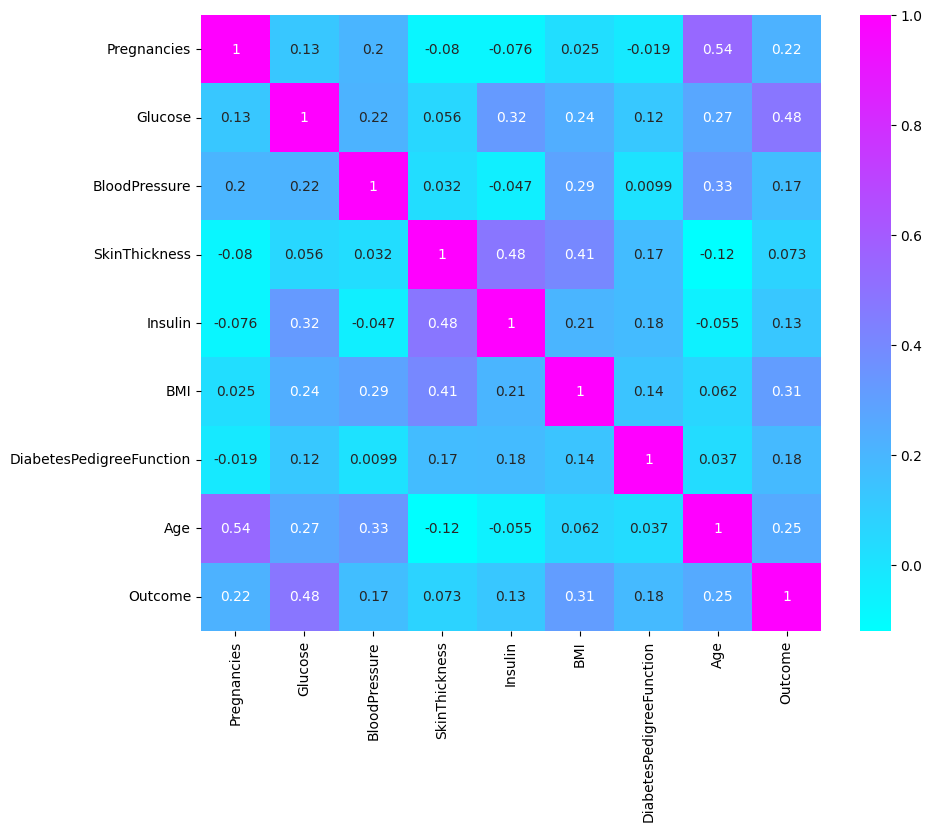

In [4]:
##plotting heatmap:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap='cool',annot=True);


In [5]:
## spliting data into features and target values:
x = data.drop("Outcome",axis =1)
y = data["Outcome"]
print(f"shape of feature dataset:{x.shape}")
print(f"shape of target dataset:{y.shape}")


shape of feature dataset:(768, 8)
shape of target dataset:(768,)


In [6]:

# checking 'y' - target counts:
class_frequencies = y.value_counts()
print(class_frequencies)


0    500
1    268
Name: Outcome, dtype: int64


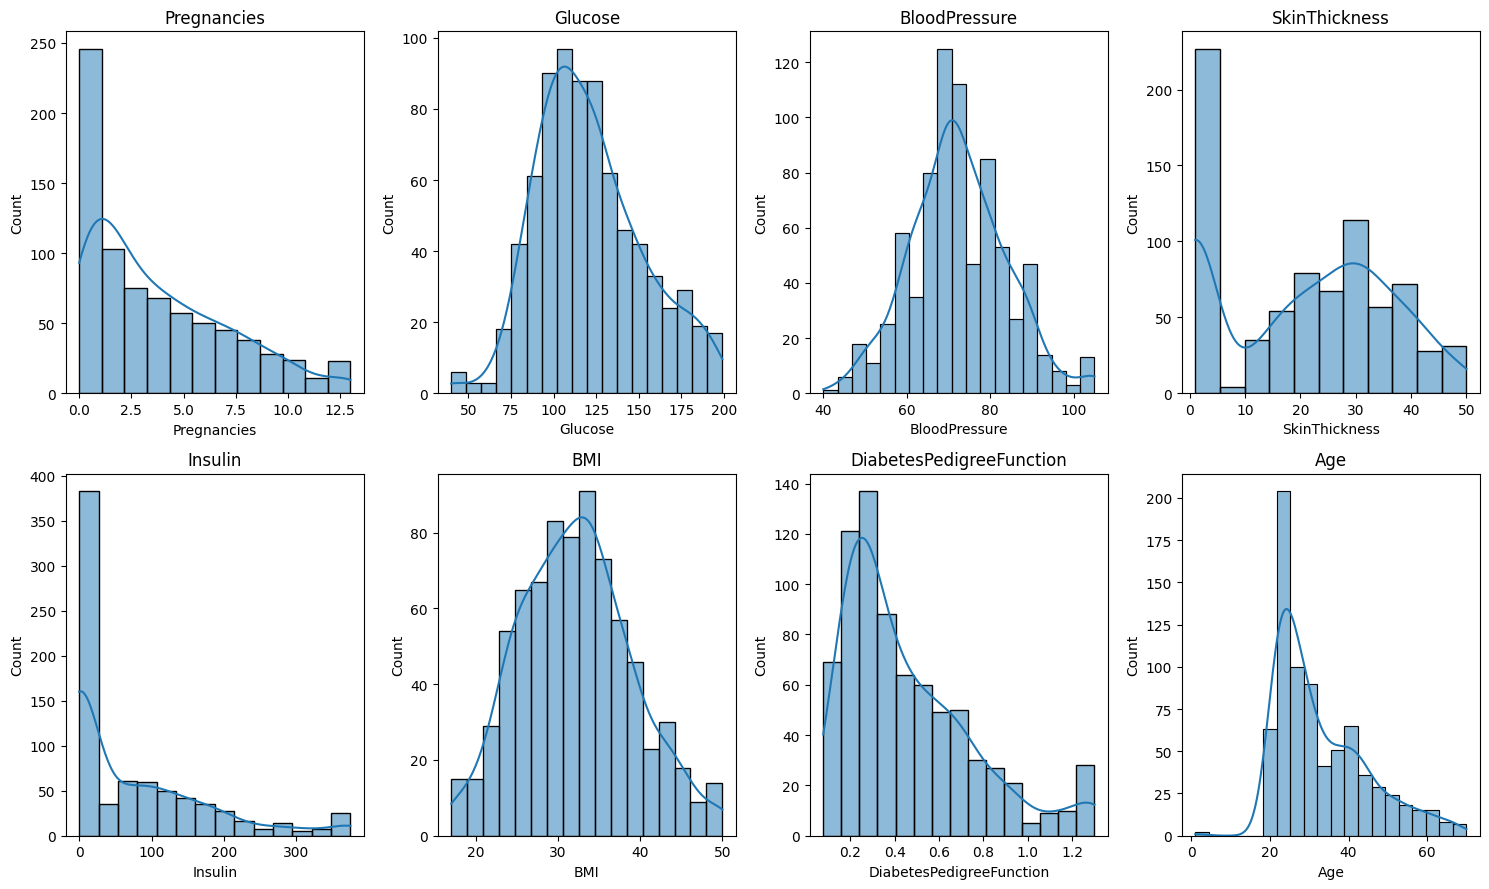

In [7]:

## ploting histplot:

num_rows = 2
num_cols = 4

# Creating grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 9))

# Flatten the axes array so you can loop through it easily
axes = axes.flatten()

# Loop through the columns and plot KDEs
for i, col in enumerate(x.columns):
    sns.histplot(x[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

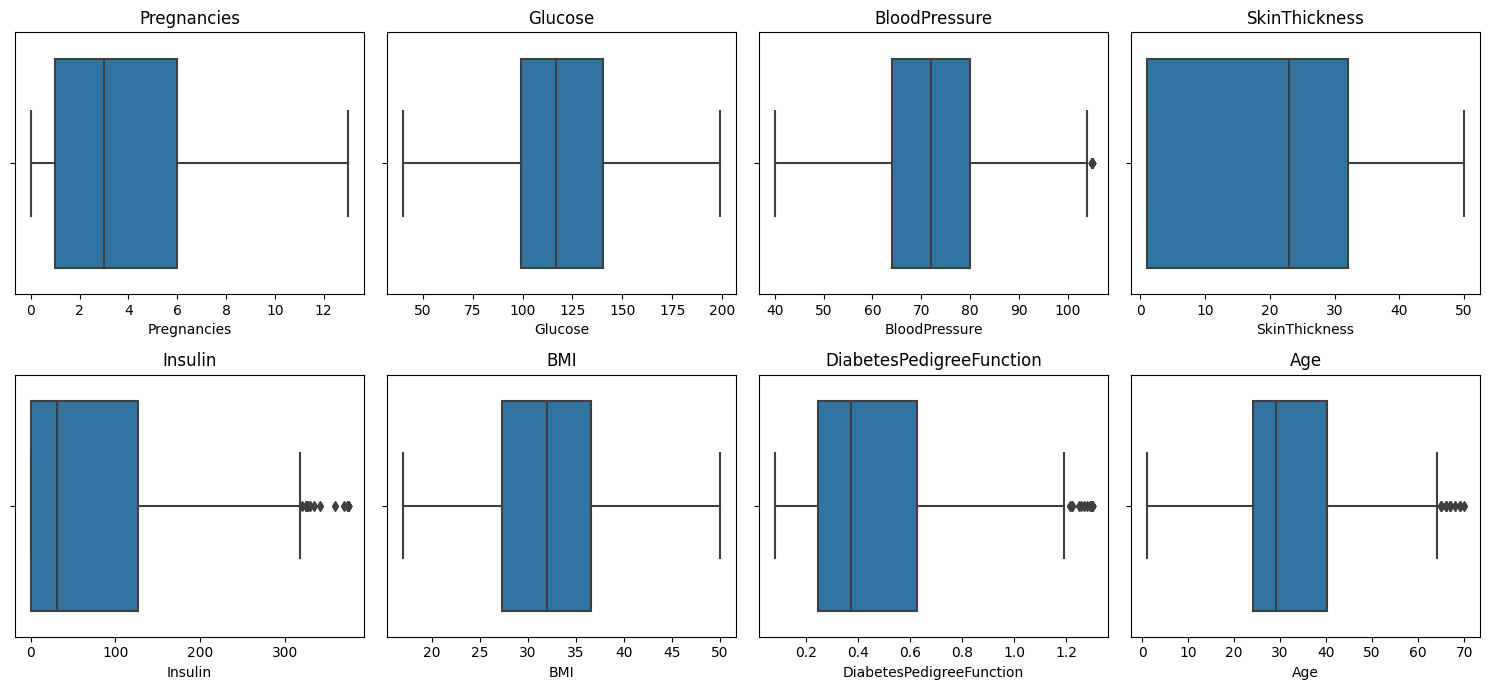

In [8]:

num_rows = 2
num_cols = 4

# Creating grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 7))

# Flatten the axes array so you can loop through it easily
axes = axes.flatten()

# Loop through the columns and plot KDEs
for i, col in enumerate(x.columns):
    sns.boxplot(data=data,x = col,ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [9]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.834635,3.336808,0.000,1.00000,3.0000,6.00000,13.0
Glucose,768.0,121.154948,31.137801,40.000,99.00000,117.0000,140.25000,199.0
BloodPressure,768.0,72.446615,11.509636,40.000,64.00000,72.0000,80.00000,105.0
SkinThickness,768.0,20.713542,15.231845,1.000,1.00000,23.0000,32.00000,50.0
Insulin,768.0,75.600260,99.048868,0.000,0.00000,30.5000,127.25000,375.0
BMI,768.0,32.171615,6.907363,17.000,27.30000,32.0000,36.60000,50.0
DiabetesPedigreeFunction,768.0,0.462083,0.294203,0.078,0.24375,0.3725,0.62625,1.3
Age,768.0,33.044271,11.663720,1.000,24.00000,29.0000,40.25000,70.0


Steps to performed:
- Spliting the x dataset into x_train, y_train , x_test, y_test
- Need to resample the data as traget frequencies are uneven.
- From resampled data choose the best features using RandomForestClassifier.
- Pass best features into Adaboostclassifier and train best feature
- Make the prediction on best features test data.

In [29]:
## import from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from  imblearn.over_sampling import SMOTE

## train test split:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

## checking shape and dimention:
print("shape of x_train{} and have dimension: {}".format(x_train.shape, x_train.ndim))
print("shape of y_train{} and have dimension: {}" .format(y_train.shape, y_train.ndim))
print("shape of x_test{}  and have dimension: {}".format(x_test.shape, x_test.ndim))
print("shape of y_test{} and have dimension: {}".format(y_test.shape, x_test.ndim))


### resampling x_train and y_train
smote = SMOTE()
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

## checking shape of resampled data:
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))


## checking frequency of resampled data:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


shape of x_train(614, 8) and have dimension: 2
shape of y_train(614,) and have dimension: 1
shape of x_test(154, 8)  and have dimension: 2
shape of y_test(154,) and have dimension: 2
After OverSampling, the shape of train_X: (802, 8)
After OverSampling, the shape of train_y: (802,) 

After OverSampling, counts of label '1': 401
After OverSampling, counts of label '0': 401


In [17]:
## parameter for RandomForestClassifier
parameters = {
            'criterion': 'entropy',
            'max_depth': 10,
            'max_features': 'log2',
            'min_samples_leaf': 2,
            'min_samples_split': 10,
            'n_estimators': 100
            }

RFC_MODEL = RandomForestClassifier(**parameters)


## parameter for AdaBoost Classifier
## parameter for adaboost:

ADA_Para = {
            "estimator":RFC_MODEL,
            "learning_rate" : 0.001
            }

ABC = AdaBoostClassifier(**ADA_Para)


In [37]:
## selecting best feature using random forest
from sklearn.feature_selection import SelectFromModel
RFC_MODEL_FIT = RFC_MODEL.fit(x_train_res, y_train_res)

# Print the feature importances
print("Feature Importances")

for i, importance in enumerate(RFC_MODEL_FIT.feature_importances_):
    print(f"Feature {i}: {importance}")

# Perform feature selection
SFM = SelectFromModel(RFC_MODEL_FIT, threshold=0.10)  # Adjust the threshold as needed

SFM.fit(x_train_res, y_train_res)

# Transform the training and testing data
X_train_selected = SFM.transform(x_train_res)
X_test_selected = SFM.transform(x_test)


Feature Importances
Feature 0: 0.04978631102552155
Feature 1: 0.2888362477929422
Feature 2: 0.07690953339454429
Feature 3: 0.057428863355767926
Feature 4: 0.061029463024577395
Feature 5: 0.19013529673439403
Feature 6: 0.11044267860566999
Feature 7: 0.1654316060665826


### final model fitting using adaboost and making prediction

In [38]:
## model training
ABC_MODEL  = ABC.fit(X_train_selected, y_train_res)
## model prediction:
y_pred = ABC_MODEL.predict(X_test_selected)


In [39]:
## importing matrics from sklearn:
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

## printig report:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        99
           1       0.59      0.75      0.66        55

    accuracy                           0.72       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.74      0.72      0.73       154



In [40]:
## printing f1 and accuracy score
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(f"f1_score : {round(f1,2)}")
print(f"accuracy_score: {round(acc,2)}")


f1_score : 0.66
accuracy_score: 0.72


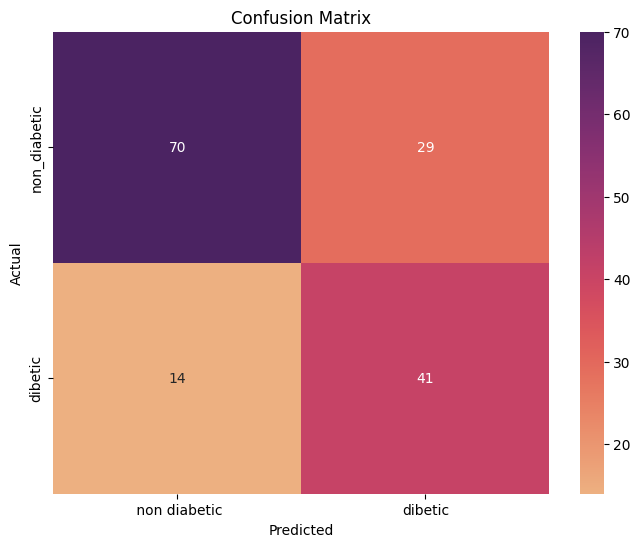

In [41]:

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure
plt.figure(figsize=(8, 6))

# Use Seaborn's heatmap to plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='flare', cbar=True,
            xticklabels=[' non diabetic', 'dibetic'], yticklabels=['non_diabetic', 'dibetic'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

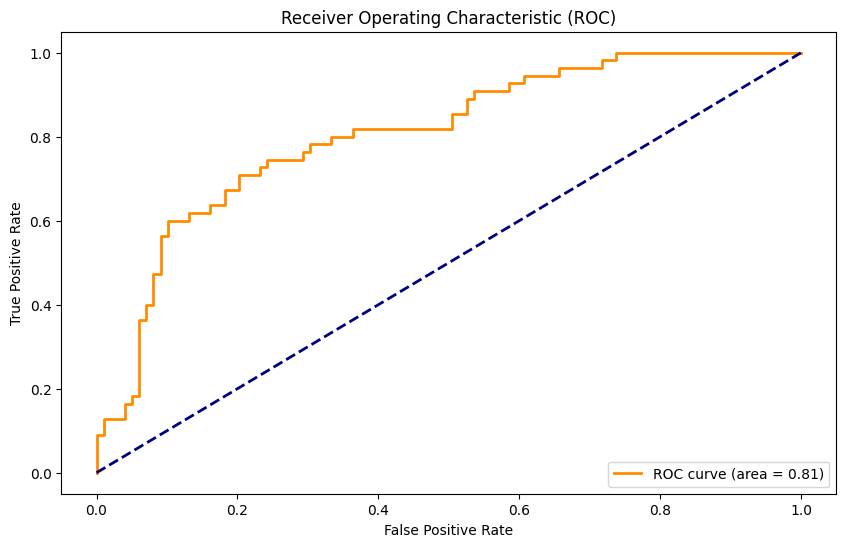

In [48]:
#prdicted probabilities for class 1 (assuming it's a binary classification problem)
y_prob = ABC_MODEL.predict_proba(X_test_selected)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [43]:

## compairing the prediction with truth values:
print("y_pred dimensions :",y_pred.ndim)
print("y_test dimension :", y_test.ndim)
"""
y_pred_flatten = y_pred.flatten()
y_test_flatten = y_test.values.flatten()
print(y_pred_flatten.ndim)
print(y_test_flatten.ndim)
"""

prediction_result = []

j=0
for i in y_test:
    if i == y_pred[j]:
        results = "correct_prediction"
        prediction_result.append(results)

    else:
        results = "wrong_prediction"
        prediction_result.append(results)
    j = j+1



## for actual and pred naming:

class_name = ["Non_Diabetic", "Diabetic"]
y_test_class = []
y_pred_class = []

for y in y_test:
    y_test_class.append(class_name[y])

for yp in y_pred:
    y_pred_class.append(class_name[yp])



prediction_table = pd.DataFrame({'Actual': y_test_class, 'Predict' : y_pred_class , "prediction_result" : prediction_result })


y_pred dimensions : 1
y_test dimension : 1


In [45]:
prediction_table.sample(50)

,Actual,Predict,prediction_result
97,Non_Diabetic,Non_Diabetic,correct_prediction
3,Non_Diabetic,Non_Diabetic,correct_prediction
82,Non_Diabetic,Non_Diabetic,correct_prediction
11,Non_Diabetic,Diabetic,wrong_prediction
26,Non_Diabetic,Non_Diabetic,correct_prediction
127,Diabetic,Diabetic,correct_prediction
39,Diabetic,Non_Diabetic,wrong_prediction
4,Non_Diabetic,Diabetic,wrong_prediction
103,Non_Diabetic,Diabetic,wrong_prediction
37,Diabetic,Diabetic,correct_prediction


---
---

1. Is it a good way to find feature importance from resample data rather whole dataset (in this case x dataset)

Sol:

Yes, it can be a valid approach to find feature importance from resampled data, especially when dealing with imbalanced datasets. Resampling techniques like SMOTE help address class imbalances by generating synthetic samples for the minority class, which can potentially lead to more accurate and reliable estimations of feature importance.

Here are some points to consider:

1. **Addressing Class Imbalance**: Resampling techniques like SMOTE help balance the class distribution, which can lead to more accurate estimates of feature importance. This is crucial when the target variable is imbalanced.

2. **Reducing Bias in Feature Importance**: In imbalanced datasets, a model might be biased towards the majority class. By resampling, you create a more balanced training set, which can potentially lead to a more balanced estimation of feature importance.

3. **Reflecting Real-World Scenarios**: In many real-world scenarios, imbalanced datasets are common. By resampling, you're simulating a scenario that is more reflective of the actual data distribution you might encounter in practice.

4. **Consideration of Domain Knowledge**: It's always important to consider domain knowledge. If you have strong reasons to believe that the original dataset distribution is more representative of the real-world scenario, you might want to use the feature importances from the original dataset.

5. **Cross-Validation**: When assessing feature importance, it's recommended to use cross-validation to get more robust estimates. This ensures that the results are not overly influenced by a specific split of the data.

Overall, using resampled data for estimating feature importance can be a good strategy, particularly in situations where class imbalance is a concern. However, it's always important to critically evaluate the results and consider the specific characteristics of your dataset and problem domain.
